In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from math import pi

In [4]:
def ellipse(tmin=0, tmax=2*pi, u=0.5, v=0.5, a=0.5, b=0.5):

    # parametric equation of an ellipse
    # x = u + a cos(t)
    # y = v + b sin(t)
    #
    # u: x-position of the center
    # v: y-position of the center
    # a: radius on the x-axis
    # b: radius on the y-axis
    
    t = np.linspace(tmin, tmax, 100)
    x = u + a*np.cos(t)
    y = v + b*np.sin(t)
    
    return x, y

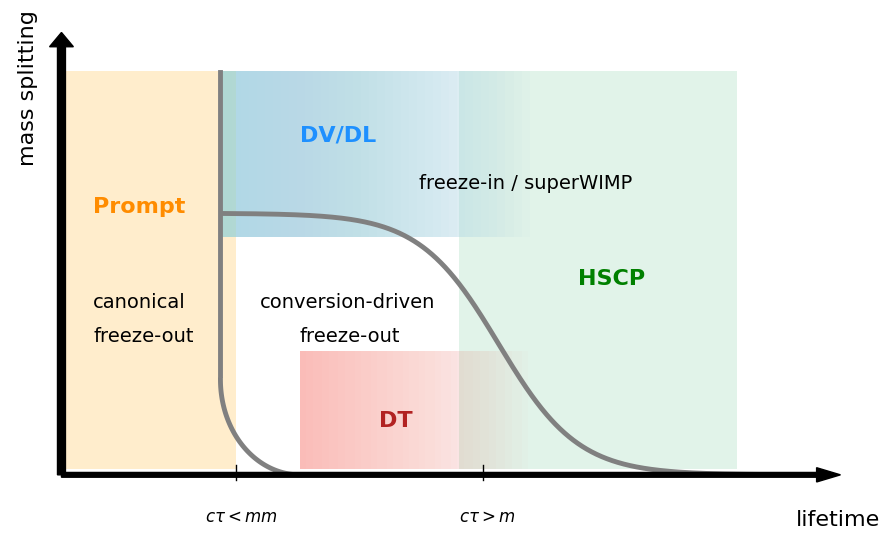

In [6]:
plt.figure(figsize=[9, 5.5])
ax = plt.gca()

# Prompt
prompt_cutoff = 0.2
plt.fill_between([0, prompt_cutoff+0.02], [0.012, 0.012], [0.85, 0.85], facecolor='orange', alpha=0.2)

# CFO
plt.axvline(prompt_cutoff-0.001, ymin=0.262, ymax=0.874, color='grey', lw=3.5)
CFO_x, CFO_y  = ellipse(tmin=pi, tmax=3*pi/2, u=0.3, v=0.2, a=0.3-prompt_cutoff, b=0.2)
plt.plot(CFO_x, CFO_y, color='grey', lw=3.5)

# HSCP
HSCP_cutoff = 0.5
plt.fill_between([HSCP_cutoff, 0.85], [0.012, 0.012], [0.85, 0.85], facecolor='mediumseagreen', alpha=0.15)

# DV/DL
# plt.fill_between([prompt_cutoff, HSCP_cutoff+0.05], [0.5, 0.5], [0.85, 0.85], facecolor='lightblue', alpha=0.4)
# Adding blurred boudary
N = 100
xData = np.linspace(prompt_cutoff, HSCP_cutoff+0.2, N)
yData = [0.5] * N
MaxBL = [[MaxBL] * N for MaxBL in np.arange(N)]
Max = [np.asarray(MaxBL[x]) for x in np.arange(N)]
for x in range (0, 60):
    ax.fill_between(xData, yData, 0.85, where=xData <Max[x]/N, facecolor='lightblue', alpha=0.05)

# DT
HSCP_cutoff = 0.5
# plt.fill_between([prompt_cutoff+0.1, HSCP_cutoff+0.05], [0.012, 0.012], [0.26, 0.26], facecolor='salmon', alpha=0.3)
# Adding blurred boudary
N = 100
xData = np.linspace(prompt_cutoff+0.1, HSCP_cutoff+0.2, N)
yData = [0.012] * N
MaxBL = [[MaxBL] * N for MaxBL in np.arange(N)]
Max = [np.asarray(MaxBL[x]) for x in np.arange(N)]
for x in range (0, 60):
    ax.fill_between(xData, yData, 0.26, where=xData <Max[x]/N, facecolor='salmon', alpha=0.02)


#CDFO
plt.axhline(0.5507, xmin=prompt_cutoff+0.05, xmax=prompt_cutoff + 0.05, color='grey', lw=3.5)
CDFO_x = np.linspace(0.203, 0.9, 1000)
CDFO_y = 0.55/(1 + np.exp(-20*(-CDFO_x+0.55)))   
plt.plot(CDFO_x, CDFO_y, color='grey', lw=3.5)


# Plot arrows for x y z axes
arrow_width = 0.01
head_width = 0.03
lead_length = 0.03
plt.arrow(0, 0, 0.95, 0, width = arrow_width, head_width=head_width, head_length=lead_length, fc='k', ec='k', zorder = 3)  # Arrow on x-axis
plt.arrow(0, 0, 0, 0.9, width = arrow_width, head_width=head_width, head_length=lead_length, fc='k', ec='k', zorder = 3)  # Arrow on y-axis

plt.xticks([])
plt.yticks([])

plt.text(prompt_cutoff-0.02, -.1, r"$c\tau<mm$", fontsize=12)
plt.text(HSCP_cutoff, -.1, r"$c\tau>m$", fontsize=12)

plt.xlabel("lifetime", fontsize = 16, loc='right')
plt.ylabel("mass splitting", fontsize = 16, labelpad = -20, loc='top')


# Texts
# prompt
plt.text(0.04, 0.55, "Prompt", color='darkorange', fontsize=16, weight="bold")
# DV/DL
plt.text(0.3, 0.7, "DV/DL", color='dodgerblue', fontsize=16, weight="bold")
# HSCP
plt.text(0.65, 0.4, "HSCP", color='green', fontsize=16, weight="bold")
# DT
plt.text(0.4, 0.1, "DT", color='firebrick', fontsize=16, weight="bold")
# CFO
plt.text(0.04, 0.35, "canonical", color='black', fontsize=14)
plt.text(0.04, 0.28, "freeze-out", color='black', fontsize=14)
# CDFO
plt.text(0.25, 0.35, "conversion-driven", color='black', fontsize=14)
plt.text(0.3, 0.28, "freeze-out", color='black', fontsize=14)
# FI/sWIMP
plt.text(0.45, 0.6, "freeze-in / superWIMP", color='black', fontsize=14)

# remove axis frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Fake ticks
plt.axvline(prompt_cutoff + 0.02, ymin=0.05, ymax=0.08, color='black', lw=1)
plt.axvline(HSCP_cutoff + 0.03, ymin=0.05, ymax=0.08, color='black', lw=1)

plt.tight_layout()
plt.savefig('./tchannel_schematic.png')
plt.show()
